In [1]:

from utils.load import load_data, load_submission
from utils.feature import (
    add_hours,
    add_hours_trig_cyclic,
    apply_feature_engineering,
    get_dummies,
    fill_na_zero,
    drop_non_input_cols,
    normalize,
    standardize
)
from utils.model import ModelEvalWrapper

In [2]:
train_df, predict_df = load_data('../data')

In [3]:
_train_df, _predict_df = apply_feature_engineering(
    train_df,
    predict_df,
    funcs=[
        add_hours,
        fill_na_zero("all"),
        normalize(["txpower_cell0", "txpower_cell1", "txpower_cell2", "txpower_cell3"]),
        standardize(
            [
                "bandwidth_cell0",
                "antennas_cell0",
                "bandwidth_cell1",
                "antennas_cell1",
                "bandwidth_cell2",
                "antennas_cell2",
                "bandwidth_cell3",
                "antennas_cell3",
            ]
        ),
        get_dummies(
            [
                "hour",
                "rutype",
                "mode",
                "frequency_cell0",
                "frequency_cell1",
                "frequency_cell2",
                "frequency_cell3",
            ]
        ),
        drop_non_input_cols,
    ],
)


In [4]:
# random forest
from sklearn.ensemble import RandomForestRegressor

model_getter = lambda: RandomForestRegressor(n_estimators=100, random_state=42)
model_trainer = lambda model, X, y, *args, **kwargs: model.fit(X, y)
model_predictor = lambda model, X: model.predict(X)
model_eval = ModelEvalWrapper(
    model_getter,
    name="Basic Linear Regression",
    model_trainer=model_trainer,
    model_predictor=model_predictor,
)

model_eval.train_and_eval(_train_df)


INFO:root:Fold 1/5
INFO:root:Train MAE: 1.0241, MAPE: 0.0373, MSE: 2.3131
INFO:root:Test MAE: 2.7753, MAPE: 0.1016, MSE: 16.7759
INFO:root:Fold 2/5
INFO:root:Train MAE: 1.0309, MAPE: 0.0377, MSE: 2.3427
INFO:root:Test MAE: 2.7548, MAPE: 0.0996, MSE: 16.5403
INFO:root:Fold 3/5
INFO:root:Train MAE: 1.0242, MAPE: 0.0375, MSE: 2.3218
INFO:root:Test MAE: 2.7842, MAPE: 0.1013, MSE: 16.8665
INFO:root:Fold 4/5
INFO:root:Train MAE: 1.0294, MAPE: 0.0376, MSE: 2.3440
INFO:root:Test MAE: 2.7337, MAPE: 0.0995, MSE: 16.2812
INFO:root:Fold 5/5
INFO:root:Train MAE: 1.0262, MAPE: 0.0375, MSE: 2.3331
INFO:root:Test MAE: 2.7541, MAPE: 0.0998, MSE: 16.3471
INFO:root:
Best model from fold 4
INFO:root:Best model mae: 2.7337, mape: 0.0995 mse: 16.2812

INFO:root:Average mae: 2.7604, mape: 0.1004, mse: 16.5622
INFO:root:Std mae: 0.0177, mape: 0.0009, mse: 0.2298

INFO:root:Analytic evaluations for best model
INFO:root:Error metrics by number of cells in usage
INFO:root:Metrics for 0 cells in usage (87225 reco

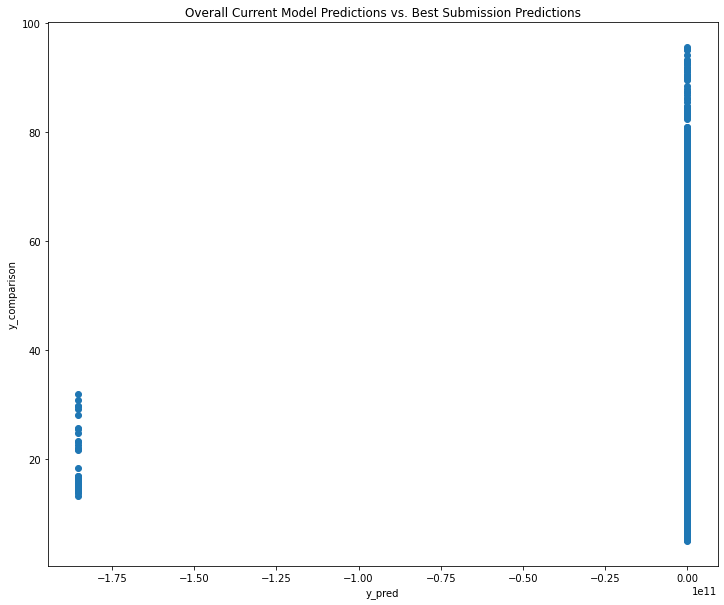

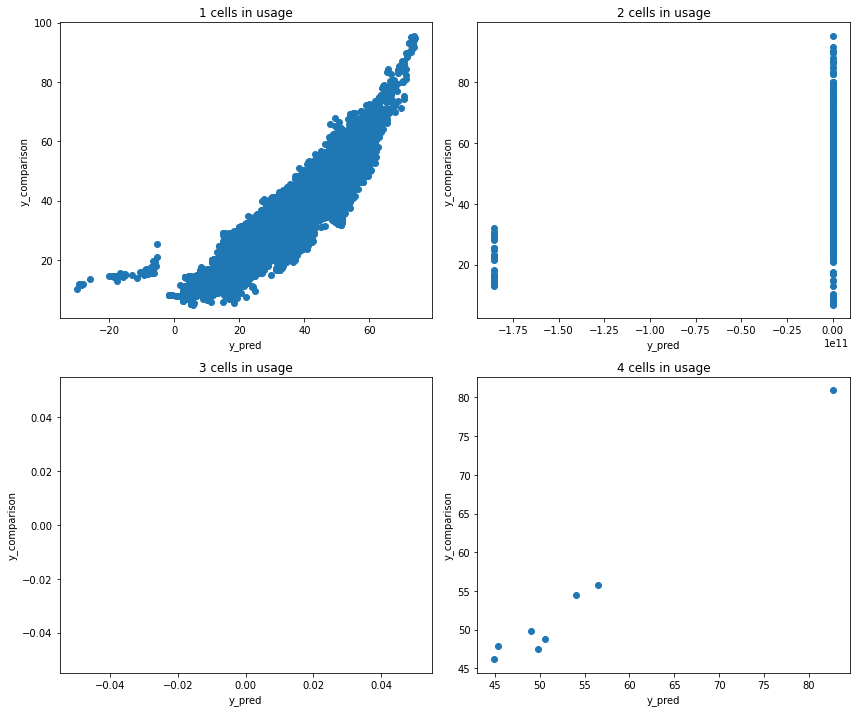

In [5]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 10)
best_submission = load_submission("bestsubmission.csv")
model_eval.compare_predictions_with(_predict_df, best_submission['Energy'])